## TF tunner samples

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
from processing import load_image_dataset

x_rgb_train, y_rgb_train = load_image_dataset('Datasets/base/train', (64, 64), True)
x_rgb_test, y_rgb_test = load_image_dataset('Datasets/base/test', (64, 64), True)
x_rgb_validation, y_rgb_validation = load_image_dataset('Datasets/base/validation', (64, 64), True)

Using TensorFlow backend.


In [4]:
from processing import load_csv_data, slice_labels

train_path = 'Datasets/espe/lbp_histograms/train'
train_data = load_csv_data(train_path)

test_path = 'Datasets/espe/lbp_histograms/test'
test_data = load_csv_data(test_path)

validation_path = 'Datasets/espe/lbp_histograms/validation'
validation_data = load_csv_data(validation_path)

# train_data.shape, test_data.shape, validation_data.shape
x_train, y_train = slice_labels(train_data)
x_test, y_test = slice_labels(test_data)
x_val, y_val = slice_labels(validation_data)

In [5]:
import pandas as pd
test_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms/test/test.csv', header=None)[1:]
train_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms/train/train.csv', header=None)[1:]
val_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms/validation/validation.csv', header=None)[1:]

x_slhtt_test, y_slhtt_test = slice_labels(test_silhouette_dataset)
x_slhtt_train, y_slhtt_train = slice_labels(train_silhouette_dataset)
x_slhtt_val, y_slhtt_val = slice_labels(val_silhouette_dataset)

In [6]:
x_rgb_train.shape, x_slhtt_train.shape, x_train.shape

((463, 64, 64, 1), (463, 2), (463, 512))

In [11]:
from utils.Models import proto_model, multi_input_model_color_silouethe
model = multi_input_model_color_silouethe()
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='multi_input_model_color_silouethe.png', show_shapes=True, show_layer_names=True)

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [13]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=18)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)
callbacks_list = [stop_early, reduce_lr]

In [14]:
history = model.fit(x=[x_train, x_slhtt_train, x_rgb_train], y=y_train, batch_size=200, epochs=100, validation_data=[[x_val, x_slhtt_val, x_rgb_validation], y_val], callbacks=callbacks_list)

Train on 463 samples, validate on 103 samples
Epoch 1/100
463/463 [==============================] - 75s 163ms/sample - loss: nan - acc: 0.1469 - val_loss: nan - val_acc: 0.1456
Epoch 2/100
463/463 [==============================] - 70s 150ms/sample - loss: nan - acc: 0.1382 - val_loss: nan - val_acc: 0.1456
Epoch 3/100
463/463 [==============================] - 73s 157ms/sample - loss: nan - acc: 0.1382 - val_loss: nan - val_acc: 0.1456
Epoch 4/100
400/463 [========================>.....] - ETA: 8s - loss: nan - acc: 0.1475 
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
463/463 [==============================] - 69s 149ms/sample - loss: nan - acc: 0.1382 - val_loss: nan - val_acc: 0.1456
Epoch 5/100
463/463 [==============================] - 72s 155ms/sample - loss: nan - acc: 0.1382 - val_loss: nan - val_acc: 0.1456
Epoch 6/100
463/463 [==============================] - 71s 154ms/sample - loss: nan - acc: 0.1382 - val_loss: nan - val_acc: 0.1456
Epoc

In [15]:
import matplotlib.pyplot as plt

In [16]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


In [18]:
print(history.history.keys())

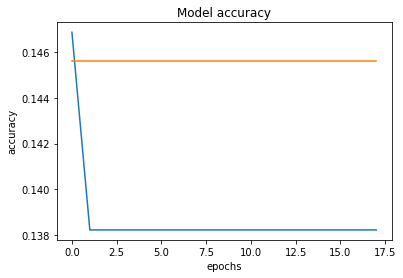

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()